## Inteligência Artificial - L.EIC029 - 2023/2025

### Group_A2_115
- Henrique Silva - up202105647 <br>
- João Couto - up202006526 <br>
- Tiago Azevedo - up202108840 <br>	


### 1. Data Preprocessing

Para começar, damos `import` de todas as bibiliotecas que vamos utilizar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import sklearn.model_selection

# ignora os warnings
warnings.filterwarnings('ignore')

De seguida, lemos o dataset.

O dataset é composto pelos seguintes dados:

- **Case_No**: Número do caso de estudo.
- **A1-A10**: [Perguntas](#-perguntas-do-q-chat-10) do Q-CHAT-10 (*Quantitative Checklist for Autism in Toddlers*) onde as respostas possíveis são *Always*, *Usually*, *Sometimes*, *Rarerly* e *Never*. Para as perguntas 1-9 (A1-A9), as respostas *Sometimes*, *Rarerly* e *Never* são mapeadas com um **1**. Na pergunta 10 (A10), as respostas *Always*, *Usually* e *Sometimes* são mapeadas com um **1**.
- **Age_Mons**: Idade em meses do indivíduo. 
- **Qchat-10-score**: Número de **1**'s no Q-CHAT-10. Quanto este valor é maior do que **3**, há indícios de que o indíviduo possa ter *ASD*.
- **Sex**: Sexo do indivíduo. 
- **Ethnicity**: Etnia do indivíduo. 
- **Jaundice**: Indica se o indíviduo possui [*Icterícia*](https://pt.wikipedia.org/wiki/Icter%C3%ADcia). 
- **Family_mem_with_ASD**: Indica se algum membro da família possui *ASD*. 
- **Who completed the test**: Indica quem realizou o teste. 
- **Class/ASD Traits**: Indica se o indíviduo tem indícios de *ASD*. <br><br>

#### Perguntas do Q-CHAT-10
- **A1**: Does your child look at you when you call his/her name?
- **A2**: How easy is it for you to get eye contact with your child?
- **A3**: Does your child point to indicate that s/he wants something? (e.g. a toy that is
out of reach)
- **A4**: Does your child point to share interest with you? (e.g. pointing at an interesting sight)
- **A5**: Does your child pretend? (e.g. care for dolls, talk on a toy phone)
- **A6**: Does your child follow where you’re looking?
- **A7**: If you or someone else in the family is visibly upset, does your child show signs of wanting to comfort them? (e.g. stroking hair, hugging them)
- **A8**: Would you describe your child’s first words as unusual?
- **A9**: Does your child use simple gestures? (e.g. wave goodbye)
- **A10**: Does your child stare at nothing with no apparent purpose?

In [2]:
data = pd.read_csv("autism_dataset_for_toddlers.csv")

# remove o espaço depois de 'Traits'
data.rename(columns={"Class/ASD Traits ": "Class/ASD Traits"}, inplace=True)

data.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


Agora que já conhecemos o nosso dataset, vamos começar por remover a coluna `Case_No`, uma vez que estes dados não são relevantes.
A coluna `Qchat-10-Score` também será removida uma vez que contém informação que permite prever a classe muito facilmente.

In [3]:
data = data.drop(["Case_No"], axis="columns")
data = data.drop(["Qchat-10-Score"], axis="columns")
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,36,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,White European,no,yes,family member,Yes


De seguida, vamos preencher a informação que falta (caso exista) com `NaN`.

In [4]:
data.fillna(np.nan, inplace=True)
data.isna().any()

A1                        False
A2                        False
A3                        False
A4                        False
A5                        False
A6                        False
A7                        False
A8                        False
A9                        False
A10                       False
Age_Mons                  False
Sex                       False
Ethnicity                 False
Jaundice                  False
Family_mem_with_ASD       False
Who completed the test    False
Class/ASD Traits          False
dtype: bool

Por último, é necessário converter as várias colunas cuja informação não são valores numéricos.

In [5]:
object_data = data.select_dtypes(include=['object']).copy()
encoder = OrdinalEncoder()

data[object_data.columns] = encoder.fit_transform(data[object_data.columns])

data.loc[:10]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,0.0,8.0,1.0,0.0,4.0,0.0
1,1,1,0,0,0,1,1,0,0,0,36,1.0,5.0,1.0,0.0,4.0,1.0
2,1,0,0,0,0,0,1,1,0,1,36,1.0,8.0,1.0,0.0,4.0,1.0
3,1,1,1,1,1,1,1,1,1,1,24,1.0,0.0,0.0,0.0,4.0,1.0
4,1,1,0,1,1,1,1,1,1,1,20,0.0,5.0,0.0,1.0,4.0,1.0
5,1,1,0,0,1,1,1,1,1,1,21,1.0,7.0,0.0,0.0,4.0,1.0
6,1,0,0,1,1,1,0,0,1,0,33,1.0,6.0,1.0,0.0,4.0,1.0
7,0,1,0,0,1,0,1,1,1,1,33,1.0,6.0,1.0,0.0,4.0,1.0
8,0,0,0,0,0,0,1,0,0,1,36,1.0,6.0,0.0,0.0,4.0,0.0
9,1,1,1,0,1,1,0,1,1,1,22,1.0,10.0,0.0,0.0,0.0,1.0


De seguida, vamos analisar a distribuição da informação do dataset e verificar se encontramos alguma anomalia.

In [6]:
data.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,0.697343,5.863378,0.273245,0.161290,3.885199,0.690702
std,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,0.459626,2.098325,0.445837,0.367973,0.639852,0.462424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,5.000000,0.000000,0.000000,4.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,1.000000,6.000000,0.000000,0.000000,4.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,1.000000,7.000000,1.000000,0.000000,4.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,1.000000,10.000000,1.000000,1.000000,4.000000,1.000000


Com base nesta tabela, podemos verificar que não existem anomalias.

- Todas as colunas possuem 1054 linhas (*count*);
- Todas as perguntas **A1-A10** possuem os valores esperados, isto é, **0** e **1**.

No entanto, é mais fácil descobrir se existem anomalias ao visualizar esta informação.

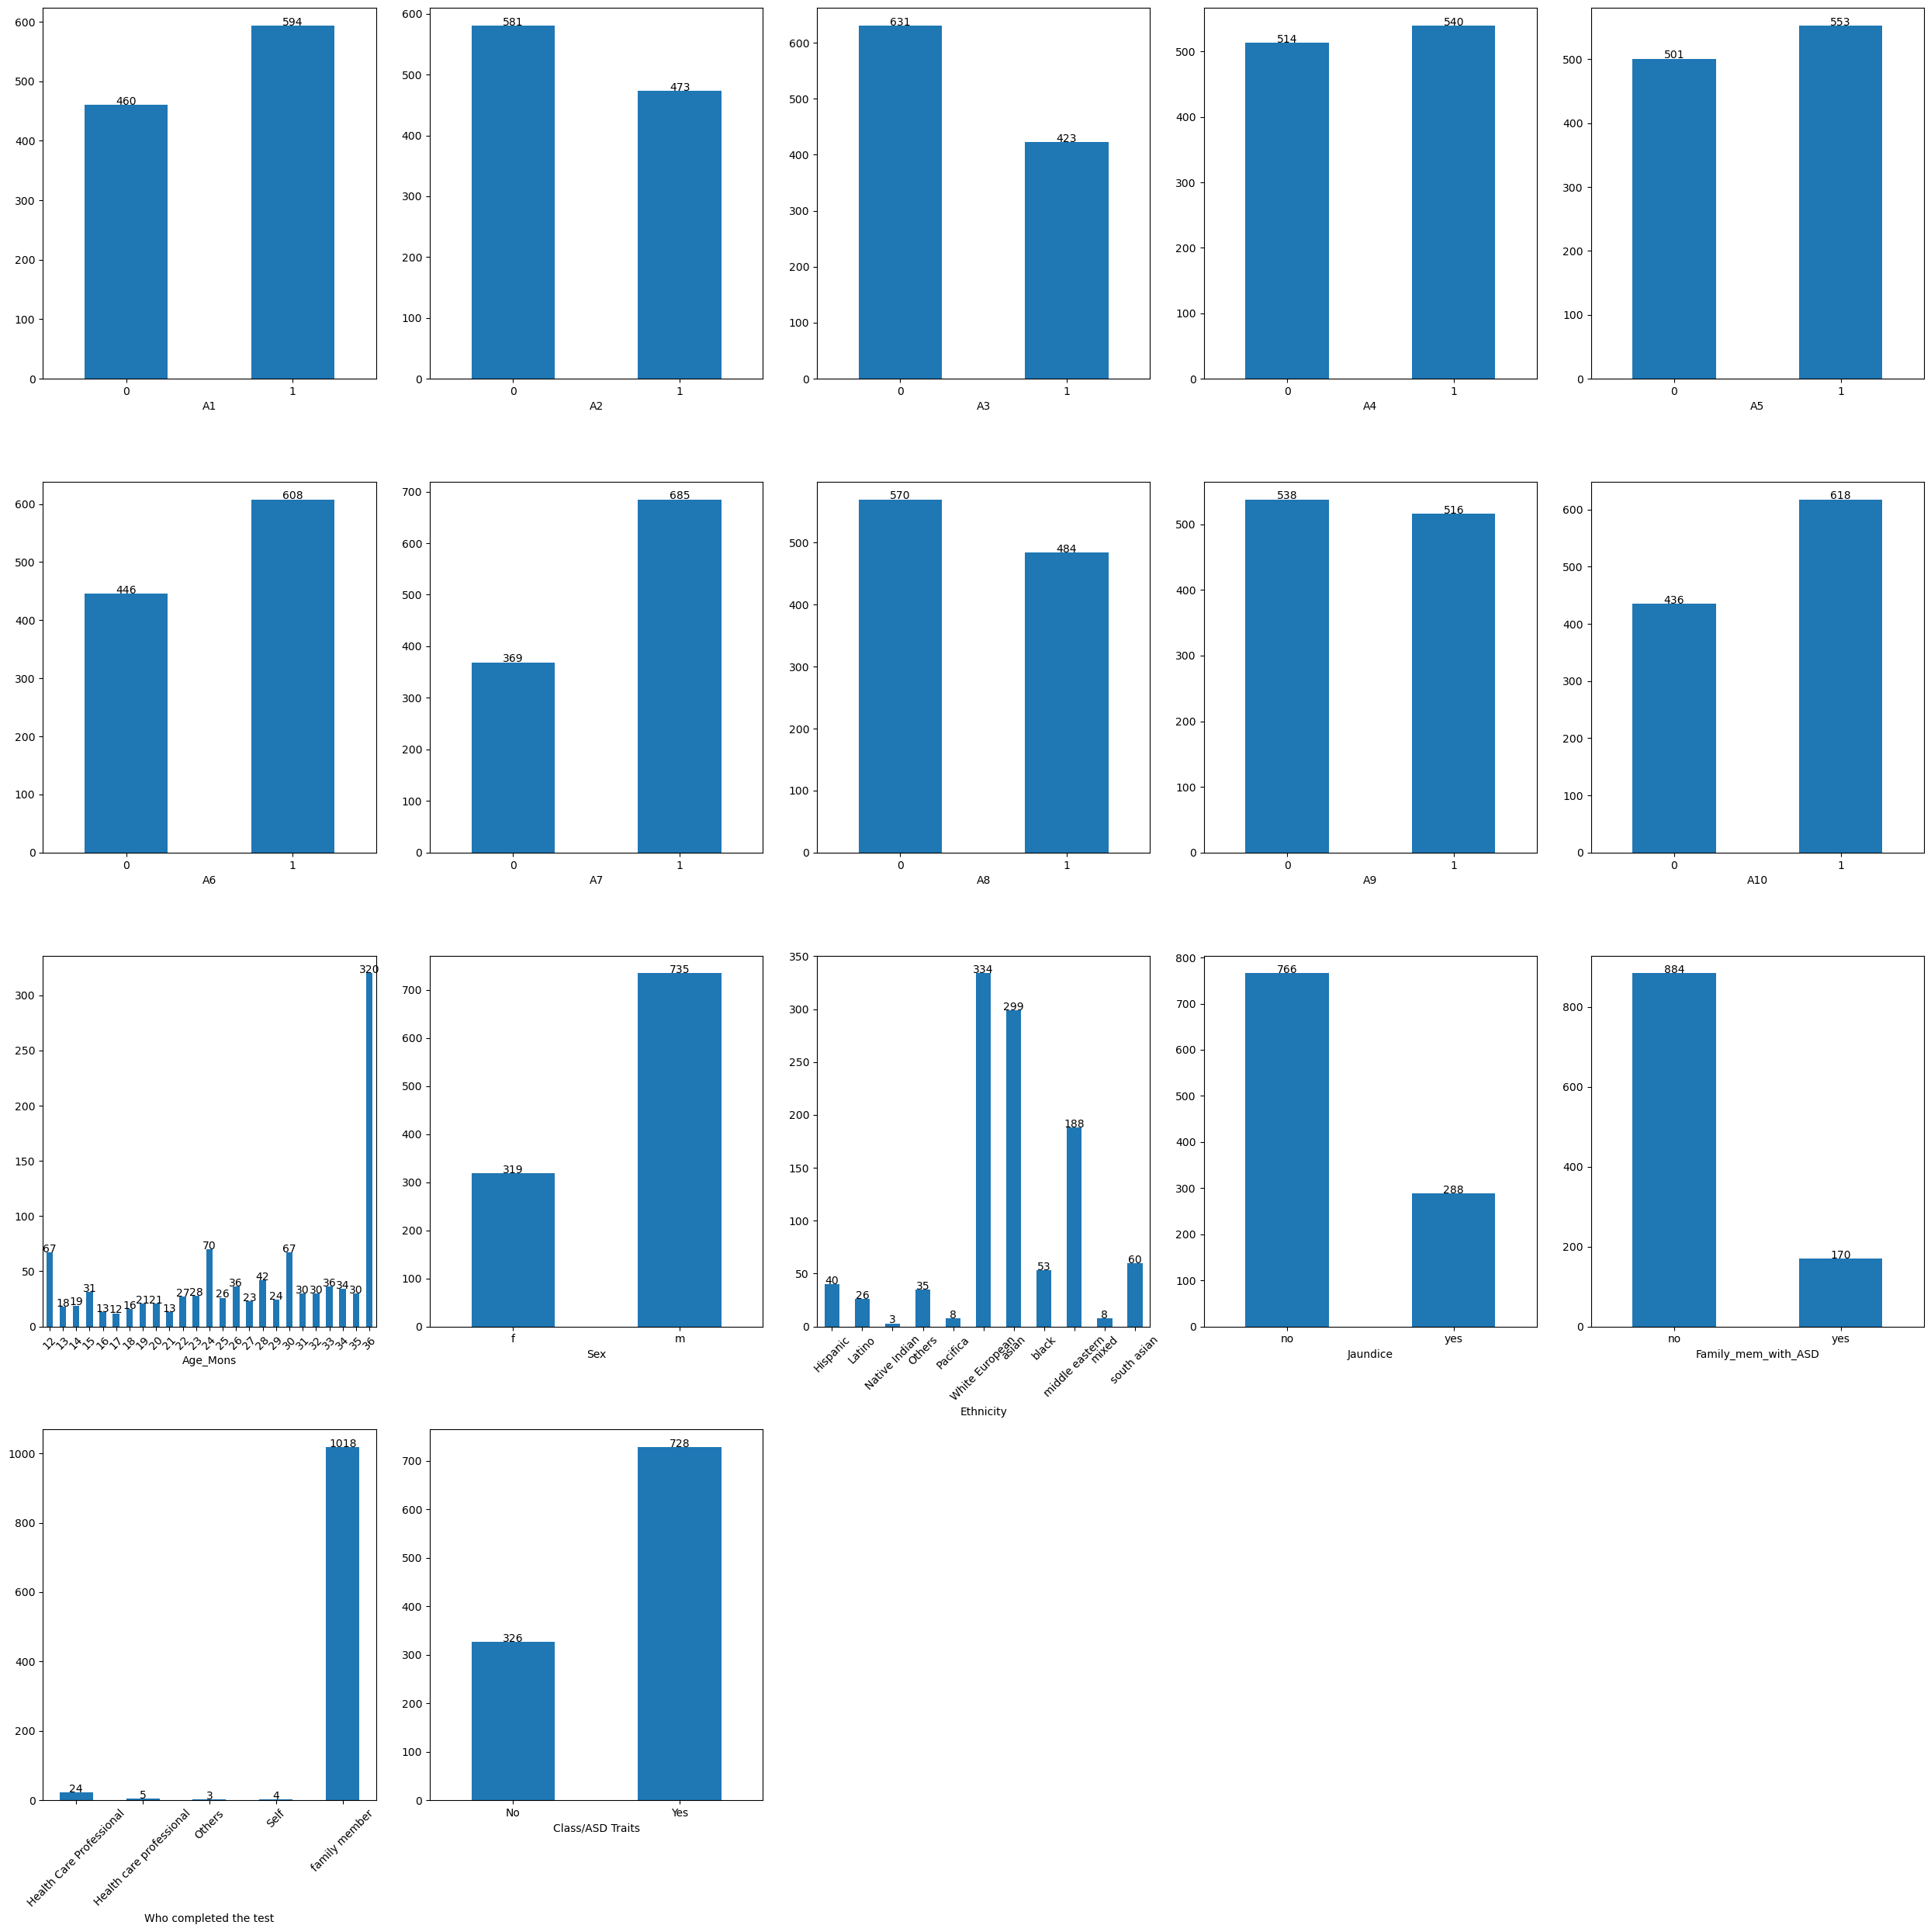

In [7]:
%matplotlib inline

# trasnforma os valores numéricos nos valores default
data_copy = data.copy()
data_copy[["Sex", "Ethnicity", "Jaundice", "Family_mem_with_ASD", "Who completed the test", "Class/ASD Traits"]] = encoder.inverse_transform(data_copy[["Sex", "Ethnicity", "Jaundice", "Family_mem_with_ASD", "Who completed the test", "Class/ASD Traits"]])

fig, axes = plt.subplots(4, 5, figsize=(25, 25))

# apaga plots que nao vao ser utilizados
fig.delaxes(axes[3, 4])
fig.delaxes(axes[3, 3])
fig.delaxes(axes[3, 2])

for index, col in enumerate(data_copy.columns):
    value_counts_sorted = data_copy[col].value_counts().sort_index()
    value_counts_sorted.plot(kind="bar", ax=axes[index//5, index % 5], rot= 45 if len(value_counts_sorted) > 10 or col == "Who completed the test" else 0)

    # coloca valores em cima das barras
    for i, v in enumerate(value_counts_sorted):
        axes[index//5, index % 5].text(i, v + 0.1, str(v), ha='center')

fig.tight_layout()

Após uma análise mais detalhada, não parece haver nenhum problema com o dataset.

### 2. Classification

Agora que já fizemos o tratamento dos dados, é preciso encontrar quais são as `features` que se relacionam mais com o `target`. Para tal, vamos fazer as matrizes de correlação.

Text(0.5, 1.0, 'Correlation Heatmap')

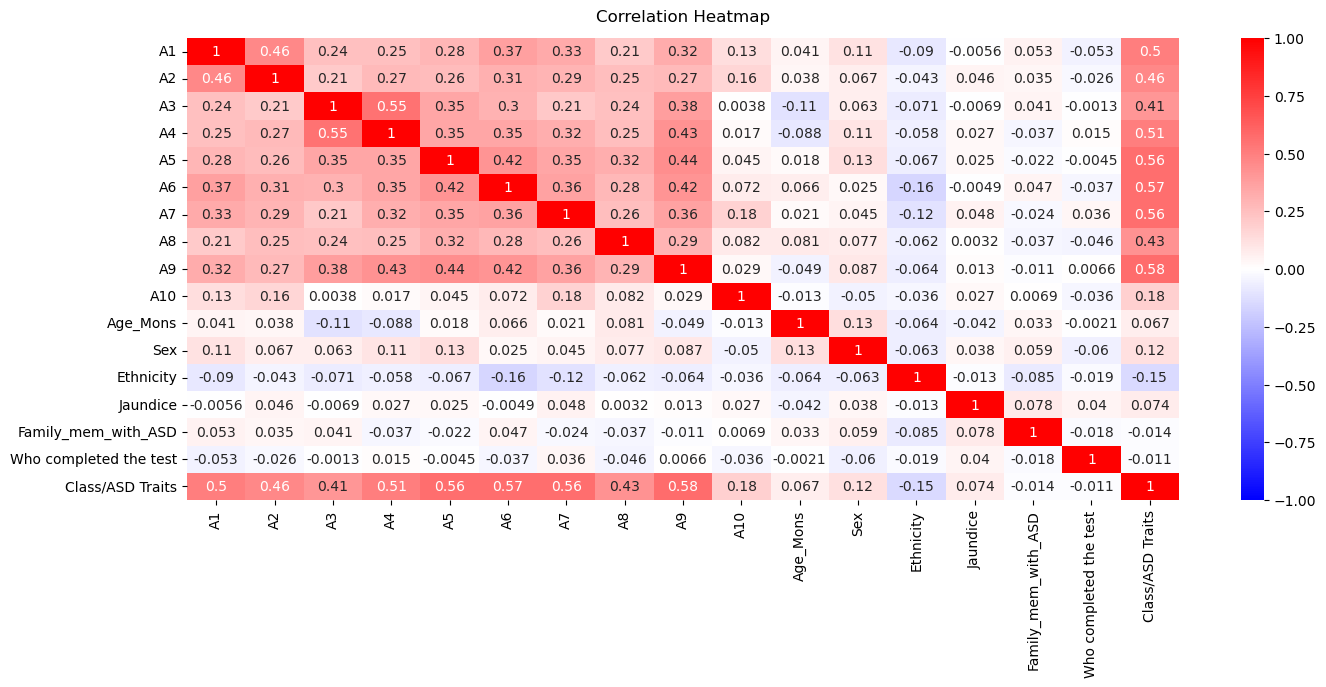

In [8]:
plt.figure(figsize=(16, 6))
heatmap = sb.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="bwr")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

Text(0.5, 1.0, 'Features correlating with Class/ASD Traits')

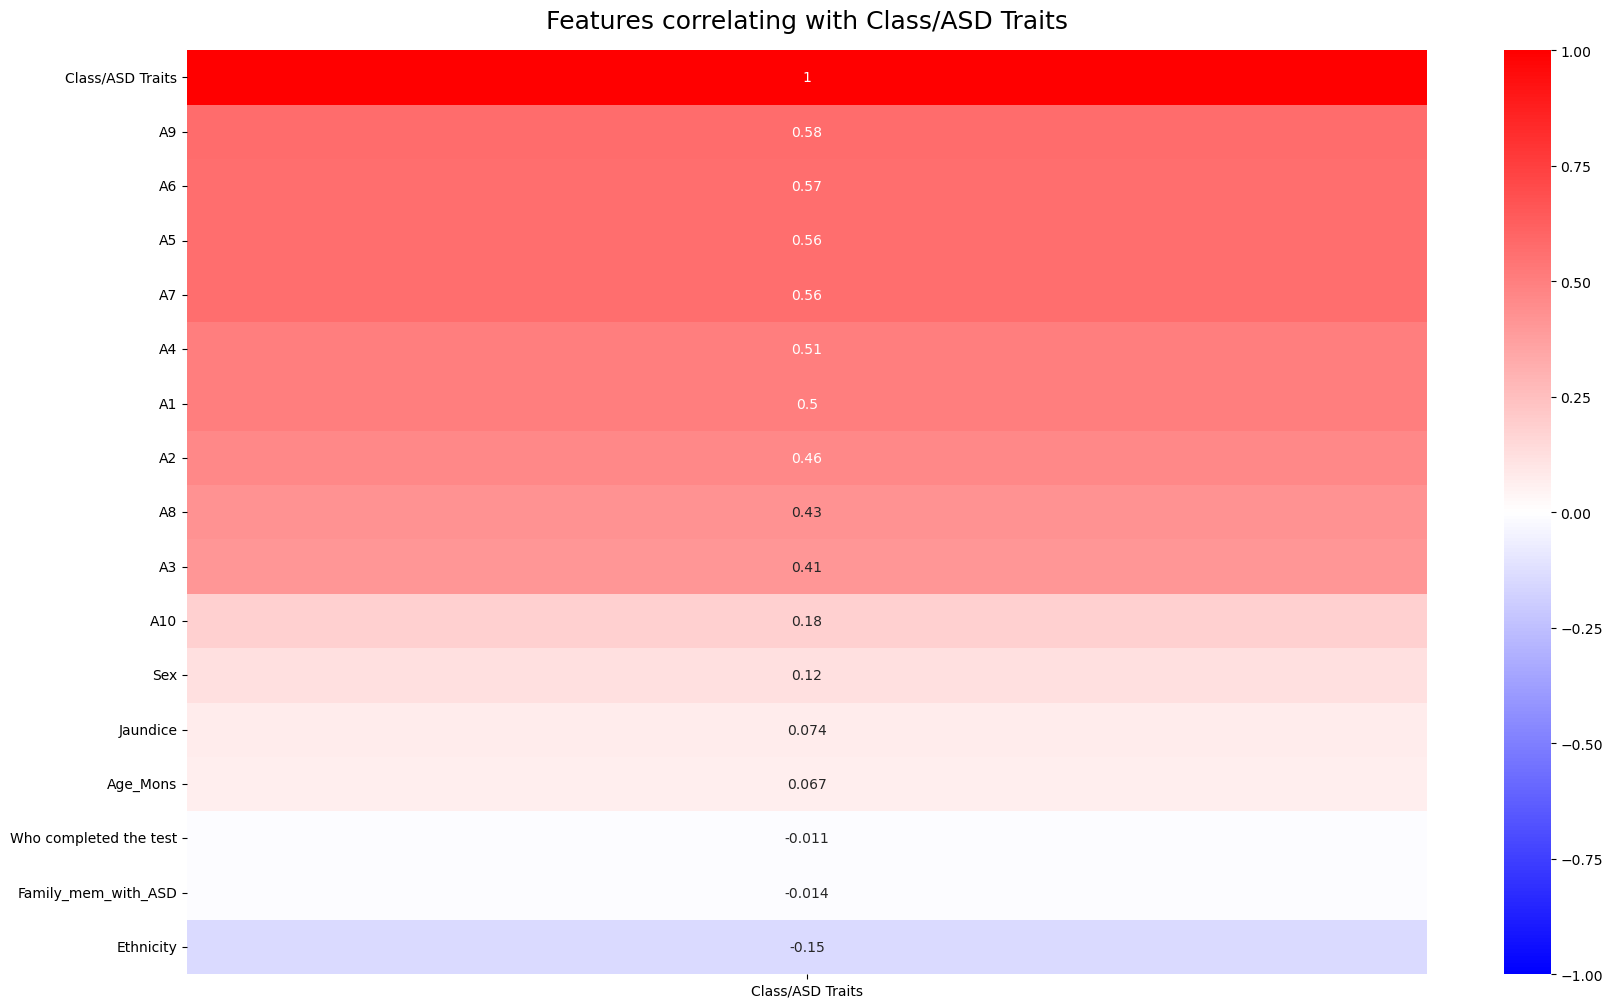

In [9]:
plt.figure(figsize=(20, 12))

heatmap = sb.heatmap(data.corr()[["Class/ASD Traits"]].sort_values(by="Class/ASD Traits", ascending=False), vmin=-1, vmax= 1, annot=True, cmap="bwr")
heatmap.set_title("Features correlating with Class/ASD Traits", fontdict={"fontsize": 18}, pad=16)

Agora vamos dividir o dataset em dois datasets, um de treino e outro de teste.

In [10]:
all_labels = data["Class/ASD Traits"].values
all_inputs = data[[col for col in data.columns if col != "Class/ASD Traits"]].values

all_inputs[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1., 28.,  0.,  8.,
         1.,  0.,  4.],
       [ 1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0., 36.,  1.,  5.,
         1.,  0.,  4.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1., 36.,  1.,  8.,
         1.,  0.,  4.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 24.,  1.,  0.,
         0.,  0.,  4.],
       [ 1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 20.,  0.,  5.,
         0.,  1.,  4.]])

In [11]:
(training_inputs, testing_inputs, training_classes, testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=0)

Antes de selecionarmos um modelo, precisamos de verificar qual é o melhor para o dataset que temos. Para isso, vamos analisar a performance de cada modelo utilizando a função `cross_validate`.
Para os modeles serem treinados de uma maneira mais eficiente e para obter resultados mais precisos, vamos utilizar `k-fold cross validation` com 5 *splits* (*cv=5*). 
Por último, vamos comparar os resultados obtidos e selecionar o modelo que teve a melhor performance no geral.

In [12]:
decision_tree = DecisionTreeClassifier() # Decision Tree
neural_netwrok = MLPClassifier() # Neural network
kneighbors = KNeighborsClassifier() # K-NN (default n = 5)
svm = SVC() # SVM

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

decision_tree_scores = sklearn.model_selection.cross_validate(decision_tree, all_inputs, all_labels, cv=5, scoring=scoring)
neural_netwrok_scores = sklearn.model_selection.cross_validate(neural_netwrok, all_inputs, all_labels, cv=5, scoring=scoring)
kneighbors_scores = sklearn.model_selection.cross_validate(kneighbors, all_inputs, all_labels, cv=5, scoring=scoring)
svm_scores = sklearn.model_selection.cross_validate(svm, all_inputs, all_labels, cv=5, scoring=scoring)

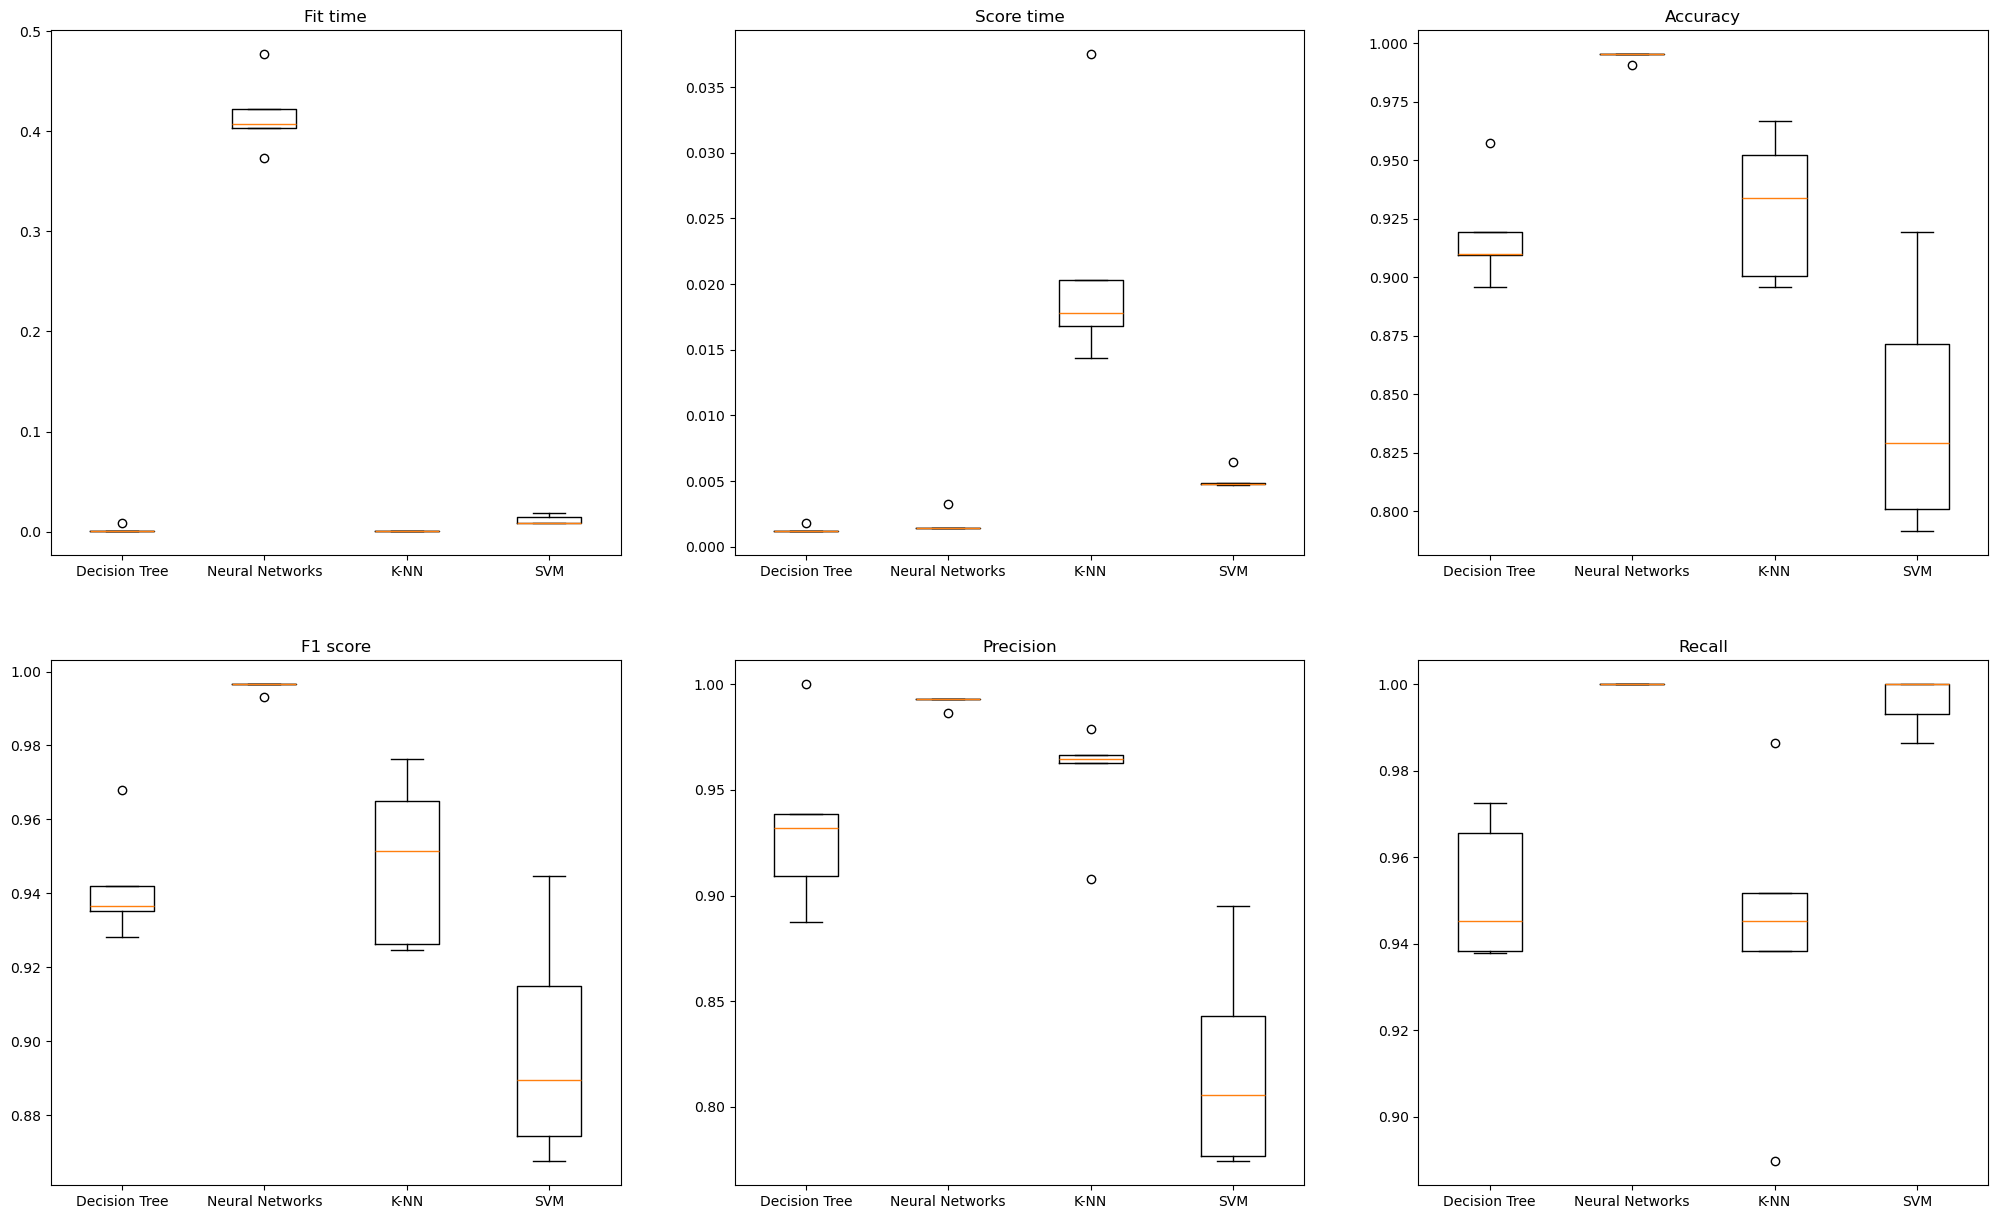

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(25,15))

fit_time = [decision_tree_scores["fit_time"], neural_netwrok_scores["fit_time"], kneighbors_scores["fit_time"], svm_scores["fit_time"]]
score_time = [decision_tree_scores["score_time"], neural_netwrok_scores["score_time"], kneighbors_scores["score_time"], svm_scores["score_time"]]
accuracy = [decision_tree_scores["test_accuracy"], neural_netwrok_scores["test_accuracy"], kneighbors_scores["test_accuracy"], svm_scores["test_accuracy"]]
f1 = [decision_tree_scores["test_f1_score"], neural_netwrok_scores["test_f1_score"], kneighbors_scores["test_f1_score"], svm_scores["test_f1_score"]]
precision = [decision_tree_scores["test_precision"], neural_netwrok_scores["test_precision"], kneighbors_scores["test_precision"], svm_scores["test_precision"]]
recall = [decision_tree_scores["test_recall"], neural_netwrok_scores["test_recall"], kneighbors_scores["test_recall"], svm_scores["test_recall"]]
scores = [fit_time, score_time, accuracy, f1, precision, recall]
titles = ["Fit time", "Score time", "Accuracy", "F1 score", "Precision", "Recall"]
names = ["Decision Tree", "Neural Networks", "K-NN", "SVM"]


for index, (score, title) in enumerate(zip(scores, titles)):
    axes[index//3, index%3].boxplot(score, labels=names)
    axes[index//3, index%3].title.set_text(title)

plt.show()

Uma vez que o `scikit-learn` não possui nenhum método para obtermos a `feature importance` dos dois modelos que tiveram melhor performance (`MLPClassifier` e `KNeighborsClassifier`), vamos analisar a feature importance do `DecisionTreeClassifier` que foi o modelo que teve a terceira melhor performance.

<Axes: >

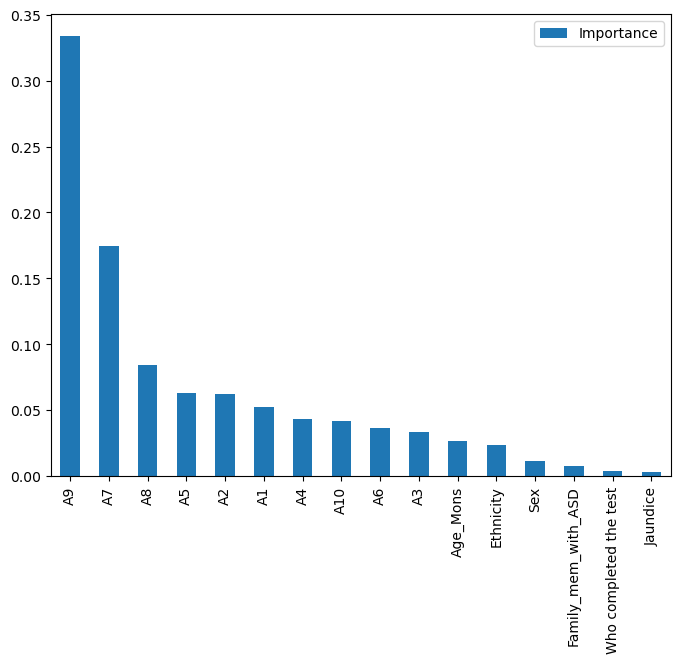

In [14]:
# feature importance DT
decision_tree.fit(training_inputs, training_classes)
decision_tree.score(testing_inputs, testing_classes)

feat_importances = pd.DataFrame(decision_tree.feature_importances_, index=[col for col in data.columns if col != "Class/ASD Traits"], columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

Após comparar este gráfico com a matriz de correlação `Features correlating with Class/ASD Traits`, podemos verificar que as features têm pesos muitos semelhantes, estando, em média, a cerca de 2 posições da sua posição em relação à matriz de correlação.

Após analisar os resultados, podemos verificar que o modelo `Neural Networks` foi o que obteve melhores resultados.

Agora vamos analisar a performance deste modelo com o dataset de teste.

In [15]:
model = MLPClassifier()
model.fit(training_inputs, training_classes)
model.score(testing_inputs, testing_classes)

1.0

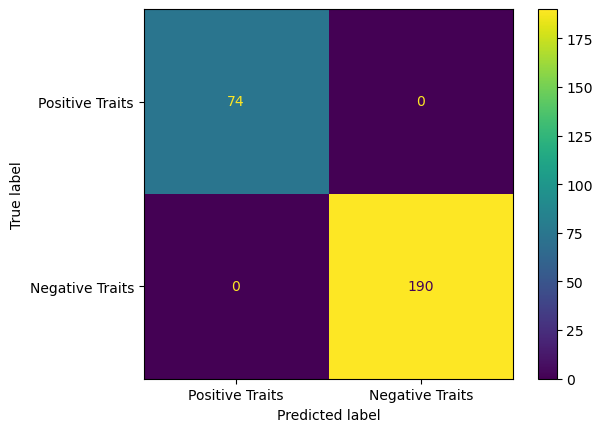

In [16]:
predicted_classes = model.predict(testing_inputs)
matrix = confusion_matrix(testing_classes, predicted_classes)

display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=["Positive Traits", "Negative Traits"])
display.plot()

plt.show()

Com base nos resultados, podemos verificar que o modelo teve uma accuracy de 100%. Embora este resultado seja muito elevado, podemos verificar que, com base na informação da performance do modelo, este modelo teve uma performance muito elevada quando se realizou k-fold cross validation. Logo, o resultado obtido encontra-se dentro das expectativas.

#### Bibliografia

- https://www.kaggle.com/datasets/vaishnavisirigiri/autism-dataset-for-toddlers?resource=download
- https://www.autismalert.org/uploads/PDF/SCREENING--AUTISM--QCHAT-10%20Question%20Autism%20Survey%20for%20Toddlers.pdf
- https://pt.wikipedia.org/wiki/Icter%C3%ADcia
- https://miamioh.edu/centers-institutes/center-for-analytics-data-science/students/coding-tutorials/python/data-cleaning.html
- https://hyperskill.org/learn/step/32241
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
- https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
- https://scikit-learn.org/stable/modules/tree.html
- https://scikit-learn.org/stable/modules/neural_networks_supervised.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
- https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html